In [2]:
%matplotlib notebook
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from random import randint
import pandas as pd
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import RMSprop
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
import tensorflow as tf
import os
import time
import setproctitle as SP
import numpy as np
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"

import matplotlib.pyplot as plt

import math
import pandas
#import keras
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Input, Flatten, Dense, BatchNormalization, ReLU, Dropout, MaxPooling1D, GlobalAveragePooling1D
from numpy import savetxt
from tensorflow.keras.losses import Huber, MeanSquaredError, huber
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow import keras
import tensorflow.keras.losses
from numpy import linalg as LA
import seaborn as sns
# from keras.regularizers import l2
# from keras import backend as K
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch,Sklearn,BayesianOptimization,Hyperband
from tensorflow.keras import layers, models
from keras_tuner.engine.hyperparameters import HyperParameters
from hyperopt import hp
from tensorflow.keras.layers import Lambda


import matplotlib
from matplotlib import font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_dirs = ["/Times_New_Roman"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
custom_font_manager = font_manager.FontManager()
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# result = font_manager.fontManager.findfont('Times New Roman')
# print(result)
plt.rcParams["font.family"] = "Times New Roman"

font = {'size'   : 12}
matplotlib.rc('font', **font)
import scipy.io


In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))


In [4]:

wavelength=np.linspace(800,890,190)
np.reshape(wavelength,(-1,190))
wavelength.shape
np.zeros((190)).shape
# x_3min_1[j,:].shape

(190,)

<IPython.core.display.Javascript object>


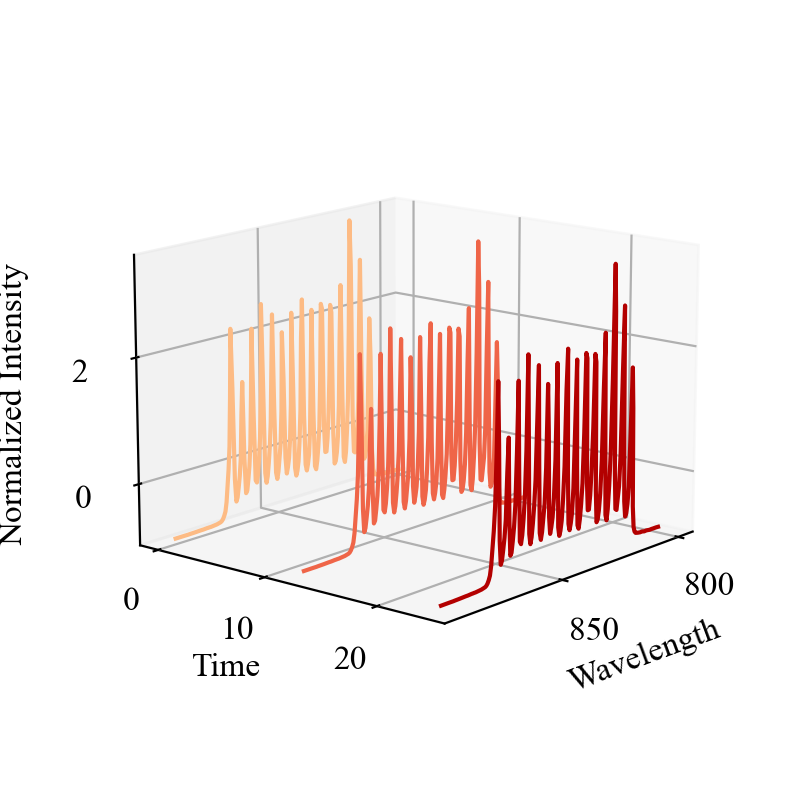

In [13]:
# Col=['#1b9e77','#d95f02','#7570b3','#9e1b84','#a6611a','#d01c8b','#2c7bb6']
# Col=['#9ecae1','#6baed6','#3182bd']
Col=['#fdbb84','#ef6548','#b30000']


os.chdir("/data/processed_data")
# os.getcwd()
Name='3min_Norm_10-05-2022'


x_3min_1_std = genfromtxt('x_'+Name+'.csv', delimiter=';')

x_3min_1 = np.mean(np.reshape(x_3min_1_std, (-1,190,3)),axis=2)
# # x_3min_1 = np.reshape(np.transpose(np.reshape(x_3min_1_std, (-1,190,3)),(0,2,1)),(-1,190))

wavelength=np.linspace(800,890,190)
j=3000

fig = plt.figure(figsize=(4,4))
ax= fig.gca(projection='3d')
plt.ion()
# color=Col[3]
ax.plot(wavelength, np.zeros((190)), x_3min_1[j,:], color=Col[0], linewidth=1.5)#,alpha=0.6
ax.plot(wavelength, np.zeros((190))+12, x_3min_1[j,:], color=Col[1], linewidth=1.5)
ax.plot(wavelength, np.zeros((190))+24, x_3min_1[j,:], color=Col[2], linewidth=1.5)
ax.locator_params(axis='x', nbins=3)
ax.locator_params(axis='y', nbins=3)
ax.locator_params(axis='z', nbins=3)
ax.view_init(elev=14., azim=40)
# ax.set_box_aspect([1,1,1])
# set_axes_equal(ax)
ax.set_xlabel('Wavelength')#, rotation=150, fontsize=12
ax.set_ylabel('Time')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Normalized Intensity', rotation=90)

fig.show() 

os.chdir("/evaluation/3DshapeExamples")
filename = 'SampleSpectra_newFormat.svg'
plt.savefig(filename,format='svg')